In [ ]:
#https://github.com/LaurentVeyssier/Topic-Modeling-and-Document-Categorization-using-Latent-Dirichlet-Allocation/blob/main/Latent_dirichlet_allocation.ipynb
#https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/4-Topic-Modeling.ipynb
#https://algorithmia.com/blog/lda-algorithm-classify-text-documents

### Topic Modeling

It is process of automatically identify topics present in a text object.

Topic Modelling is different from rule-based text mining approaches that use regular expressions or dictionary based keyword searching techniques. It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

example like : Words like money, trend, nifty,stock  are appeared more times in corpus means this corpus talks about Stock market.

Topic modeling are more useful for 
1) document clustering
2) organizing large blocks of textual data
3) information retrieval from unstructured text
4) feature selection

Applications
     
     1) New York Times are using topic models to boost their user – article recommendation engine.
     
     2) In recruitment industries where they aim to extract latent features of job descriptions and map them to right candidates.


In [2]:
#Check current working directory
%pwd

'C:\\Users\\SJ\\Desktop\\NLP'

In [3]:
import os 
os.chdir('C:/Users/SJ/Desktop/NLP/Topic Modelling')

In [4]:
%pwd

'C:\\Users\\SJ\\Desktop\\NLP\\Topic Modelling'

In [6]:
#unzip 
import zipfile

with zipfile.ZipFile('A Million news headlines.zip','r') as file:
    file.printdir()
    #extract file
    file.extractall()

File Name                                             Modified             Size
abcnews-date-text.csv                          2021-01-23 22:40:44     62726972


In [1]:
#load required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('abcnews-date-text.csv')
data.head(5)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [11]:
#Check shape
data.shape

(1226258, 2)

In [13]:
#For our easy purpose reduce the data size

data=data[:20000]
data.shape

(20000, 2)

In [14]:
#drop publish date
data=data.drop(columns=['publish_date'])
data.head(2)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation


In [15]:
#set index
data['index']=data.index

In [16]:
data.head(2)

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1


### Data preprocessing

In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *
np.random.seed(20)

In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
def lemmatize_stemming(text):
    wnl = WordNetLemmatizer()
    #past tense to present tense
    return wnl.lemmatize(text,pos='v')  

#Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):  #Converts a document into a list of tokens.
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            #apply lemmatize_stemming on tokenize
            result.append(lemmatize_stemming(token))
    return result

In [27]:
#preprocessed text
preprocessed_doc=data['headline_text'].map(lambda x : preprocess(x))
preprocessed_doc[:5]

0       [decide, community, broadcast, licence]
1                  [witness, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object

In [28]:
#original text
data['headline_text'].head(5)

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [29]:
''''Create a dictionary from 'preprocessed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
#a mapping between words and their integer ids.
dictionary =gensim.corpora.Dictionary(preprocessed_doc)

In [31]:
for id, val in dictionary.iteritems():
    print(id, val)

0 broadcast
1 community
2 decide
3 licence
4 aware
5 defamation
6 witness
7 call
8 infrastructure
9 protection
10 summit
11 aust
12 rise
13 staff
14 strike
15 affect
16 australian
17 travellers
18 ambitious
19 jump
20 olsson
21 triple
22 win
23 antic
24 barca
25 break
26 delight
27 record
28 aussie
29 match
30 memphis
31 qualifier
32 stosur
33 waste
34 address
35 council
36 iraq
37 security
38 australia
39 lock
40 timetable
41 contribute
42 million
43 birthday
44 celebrate
45 robson
46 ahead
47 bathhouse
48 plan
49 championship
50 cycle
51 hop
52 launceston
53 boost
54 paroo
55 supply
56 water
57 bill
58 blizzard
59 bury
60 state
61 unite
62 brigadier
63 dismiss
64 harass
65 report
66 troop
67 arrive
68 british
69 combat
70 daily
71 kuwait
72 bryant
73 double
74 lakers
75 lead
76 overtime
77 bushfire
78 centrelink
79 urge
80 victims
81 attack
82 businesses
83 prepare
84 terrorist
85 avenge
86 calleri
87 defeat
88 eliminate
89 final
90 massu
91 blend
92 ethanol
93 fuel
94 carews
95 frea

1242 environment
1243 arab
1244 condemnation
1245 crimes
1246 press
1247 island
1248 nightclub
1249 rhode
1250 dollar
1251 bougainville
1252 withdraw
1253 negative
1254 share
1255 territory
1256 week
1257 bartlett
1258 block
1259 beattie
1260 unaware
1261 bedi
1262 chucker
1263 murali
1264 belgian
1265 steal
1266 production
1267 restart
1268 gun
1269 league
1270 blake
1271 paradorn
1272 bracks
1273 deans
1274 pension
1275 year
1276 platform
1277 bangkok
1278 briton
1279 acquit
1280 brothel
1281 hire
1282 owner
1283 underage
1284 allegedly
1285 front
1286 burmas
1287 hectares
1288 cairns
1289 canberra
1290 grab
1291 brawl
1292 kiwi
1293 candleholders
1294 recall
1295 brogden
1296 carr
1297 hook
1298 sink
1299 stuttgart
1300 area
1301 expand
1302 counsel
1303 blob
1304 chew
1305 china
1306 wage
1307 africa
1308 chirac
1309 sideline
1310 residents
1311 inventory
1312 cattle
1313 export
1314 sheep
1315 clinton
1316 anglers
1317 committal
1318 goulburn
1319 riot
1320 consult
1321 costello
1

2698 father
2699 wilderness
2700 firefighter
2701 waterbomber
2702 fisher
2703 chela
2704 mexico
2705 shamble
2706 galthie
2707 withdrawal
2708 barcoo
2709 bendigo
2710 fyffe
2711 broadway
2712 yaos
2713 affair
2714 foursome
2715 nicklaus
2716 intervene
2717 earners
2718 watcher
2719 gunman
2720 wound
2721 headmaster
2722 henman
2723 herbert
2724 tip
2725 deaths
2726 heroin
2727 fleet
2728 satisfy
2729 chaffey
2730 hodge
2731 craze
2732 holy
2733 hospitality
2734 kenyas
2735 bag
2736 fruitpickers
2737 pool
2738 foreign
2739 iraqis
2740 like
2741 timorese
2742 islamic
2743 mahathir
2744 weapon
2745 jag
2746 lambie
2747 deterrent
2748 judge
2749 tidy
2750 towns
2751 elite
2752 euro
2753 nearer
2754 kefu
2755 federation
2756 government
2757 soccer
2758 islanders
2759 resign
2760 kuerten
2761 loggers
2762 shareholders
2763 winegrape
2764 suggest
2765 driveway
2766 stepfather
2767 custody
2768 remand
2769 cooloola
2770 maroochy
2771 abreast
2772 marshall
2773 marsh
2774 marys
2775 official


4198 milkman
4199 bench
4200 basin
4201 rid
4202 berger
4203 guitar
4204 duckworth
4205 extent
4206 joust
4207 conductor
4208 takeover
4209 bulldog
4210 sustain
4211 cargill
4212 casanova
4213 muller
4214 archdiocese
4215 mercy
4216 crunch
4217 fortnight
4218 tilt
4219 trophy
4220 chiesa
4221 bias
4222 psych
4223 teenage
4224 clarks
4225 swarm
4226 pointless
4227 consultation
4228 mentor
4229 coronation
4230 cosmetic
4231 rear
4232 load
4233 unavoidable
4234 incite
4235 deadline
4236 developers
4237 downshifts
4238 serve
4239 developer
4240 bully
4241 dili
4242 drainage
4243 heed
4244 elber
4245 cloud
4246 emkanimblaem
4247 swindle
4248 alienate
4249 capitalise
4250 organic
4251 rich
4252 starve
4253 subsidies
4254 bananas
4255 hoodlums
4256 bairnsdale
4257 invade
4258 secretary
4259 seqld
4260 tightlipped
4261 profile
4262 blackmail
4263 professional
4264 rapists
4265 armstrongs
4266 retaliation
4267 carats
4268 dangle
4269 jewellers
4270 facelift
4271 bernstein
4272 keelty
4273 liabi

5697 birdsville
5698 sober
5699 mori
5700 bore
5701 bout
5702 prim
5703 nelly
5704 negotiate
5705 department
5706 aside
5707 pyongyang
5708 seoul
5709 sons
5710 jackaroo
5711 inmates
5712 net
5713 videos
5714 temporarily
5715 lay
5716 racq
5717 standardisation
5718 ravanelli
5719 efficiency
5720 ultimatum
5721 symptoms
5722 warlords
5723 smith
5724 walkout
5725 smugglers
5726 tampa
5727 provocation
5728 peak
5729 indecent
5730 whatmore
5731 cranky
5732 pretzels
5733 loyalty
5734 thunderbirds
5735 grazier
5736 kidney
5737 environmentally
5738 disallow
5739 contagion
5740 graffiti
5741 creditors
5742 unsecured
5743 oxfam
5744 whan
5745 casualty
5746 whitaker
5747 malaysian
5748 foyer
5749 foreigners
5750 mitsubishi
5751 russians
5752 bequest
5753 gadget
5754 weight
5755 employ
5756 abduct
5757 assume
5758 thumb
5759 respiratory
5760 deformity
5761 spinal
5762 hypocrite
5763 sect
5764 warpath
5765 internally
5766 gene
5767 identification
5768 distributor
5769 divers
5770 foodchain
5771 aw

7197 wellman
7198 transvestite
7199 docklands
7200 architects
7201 renovation
7202 artworks
7203 modest
7204 outbreaks
7205 hoon
7206 belohvosciks
7207 panne
7208 colo
7209 jumper
7210 sausage
7211 sunflower
7212 meat
7213 cameras
7214 minimium
7215 rdaa
7216 conduit
7217 curtain
7218 reconstruction
7219 dimarco
7220 georgia
7221 imprisonment
7222 flamengo
7223 maso
7224 shirvo
7225 available
7226 ghan
7227 mend
7228 tonight
7229 hastings
7230 scoff
7231 pregnant
7232 sellers
7233 eldest
7234 waynes
7235 outdoor
7236 piero
7237 turin
7238 basics
7239 manufacturer
7240 vacuum
7241 deregulate
7242 loxton
7243 macarthur
7244 processor
7245 dida
7246 keeper
7247 recruitment
7248 gers
7249 myskina
7250 menangle
7251 interstate
7252 prosecutor
7253 naval
7254 lot
7255 websites
7256 deflect
7257 objection
7258 progs
7259 refinerys
7260 inflict
7261 notice
7262 plucky
7263 piggins
7264 cervical
7265 pill
7266 rowdy
7267 iron
7268 drunkenness
7269 rayo
7270 governors
7271 implosion
7272 manger


8909 beachleys
8910 kennelly
8911 tarnish
8912 truss
8913 imitate
8914 mcgee
8915 inheritance
8916 resurface
8917 trios
8918 deaf
8919 mutant
8920 westralia
8921 frustration
8922 nolans
8923 interactive
8924 perpignan
8925 toulouse
8926 swagger
8927 grid
8928 equip
8929 airplay
8930 pasture
8931 liken
8932 runway
8933 heath
8934 stringent
8935 stafford
8936 premature
8937 asap
8938 fugitive
8939 thirteenth
8940 interchange
8941 quarterly
8942 warwick
8943 feasible
8944 projections
8945 avon
8946 xstrata
8947 yank
8948 yarrabah
8949 hornets
8950 academics
8951 medication
8952 sudden
8953 spotty
8954 deportivos
8955 makaay
8956 beijings
8957 pipe
8958 mortimer
8959 carpenter
8960 cleaners
8961 austrian
8962 scotlands
8963 neverfail
8964 wakelin
8965 corretja
8966 dupuis
8967 airstrip
8968 impasse
8969 bobetko
8970 croatian
8971 kogarah
8972 regionalisation
8973 becker
8974 edberg
8975 autobiography
8976 navys
8977 iwestraliai
8978 mourinho
8979 portos
8980 ferdinand
8981 squash
8982 wind

10447 glimmer
10448 udays
10449 fortify
10450 stevedoring
10451 foes
10452 venezuelas
10453 widower
10454 epileptic
10455 inmigration
10456 surpass
10457 supercars
10458 taker
10459 bournemouth
10460 embassies
10461 buckingham
10462 certification
10463 darwinites
10464 leech
10465 elia
10466 bolter
10467 fava
10468 instinctive
10469 trespass
10470 mcgarvie
10471 ormeau
10472 things
10473 chapel
10474 blueprint
10475 perceive
10476 lamentable
10477 storey
10478 metcard
10479 milicic
10480 presidents
10481 bottomless
10482 rarest
10483 tortoise
10484 ignite
10485 anglicans
10486 congregations
10487 susie
10488 handguns
10489 motivation
10490 demonstration
10491 venezualan
10492 argentinas
10493 bluefin
10494 avellinos
10495 inexperienced
10496 wynnum
10497 hitchcock
10498 ferran
10499 bruton
10500 detection
10501 cardiff
10502 cashier
10503 tannery
10504 sheppards
10505 reapply
10506 breeders
10507 palliative
10508 embattle
10509 rollover
10510 uninjured
10511 foxy
10512 schlager
10513 a

In [32]:
print(dictionary)

Dictionary(10555 unique tokens: ['broadcast', 'community', 'decide', 'licence', 'aware']...)


In [33]:
#Count each words
from collections import Counter
count=Counter()
for doc in preprocessed_doc:
    for word in doc:
        count[word]+=1
        
print(count)       

Counter({'police': 659, 'iraq': 625, 'govt': 583, 'plan': 488, 'council': 354, 'sars': 354, 'claim': 345, 'say': 342, 'urge': 329, 'charge': 323, 'face': 322, 'kill': 304, 'fund': 302, 'court': 290, 'report': 280, 'iraqi': 262, 'warn': 234, 'baghdad': 226, 'water': 218, 'boost': 215, 'death': 213, 'continue': 212, 'seek': 208, 'force': 205, 'concern': 205, 'world': 202, 'crash': 198, 'lead': 197, 'troop': 191, 'meet': 191, 'attack': 189, 'miss': 188, 'health': 184, 'group': 183, 'probe': 178, 'open': 172, 'anti': 171, 'call': 168, 'talk': 168, 'murder': 166, 'consider': 165, 'help': 163, 'rise': 161, 'protest': 161, 'welcome': 160, 'win': 159, 'take': 159, 'fight': 159, 'test': 157, 'australia': 156, 'hospital': 156, 'bomb': 154, 'rain': 154, 'budget': 154, 'change': 153, 'home': 152, 'service': 152, 'support': 152, 'hold': 151, 'north': 151, 'return': 151, 'drug': 149, 'offer': 148, 'minister': 146, 'aust': 141, 'drought': 141, 'coast': 139, 'defend': 135, 'final': 134, 'begin': 134, 

In [34]:
count['police']

659

In [35]:
''' remove very rare word and very common words
- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
#for this we need to use gensim.filter_extreme()
dictionary.filter_extremes(no_below=15,no_above=0.1,keep_n=100000)

In [36]:
len(dictionary)

1272

# gensim.doc2bow(document)

Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. Each word is assumed to be a tokenized and normalized string (either unicode or utf8-encoded). No further preprocessing is done on the words in document; apply tokenization, stemming etc. before calling this method.


In [37]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus=[dictionary.doc2bow(doc) for doc in preprocessed_doc]
bow_corpus  # (token_id, token_count)

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1)],
 [(4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1)],
 [(10, 1), (11, 1), (12, 1)],
 [(13, 1), (14, 1), (15, 1)],
 [(16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1)],
 [(7, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(25, 1)],
 [(23, 1), (25, 1), (26, 1)],
 [(17, 1), (27, 1)],
 [(28, 1), (29, 1)],
 [(30, 1), (31, 1)],
 [(29, 1), (32, 1), (33, 1), (34, 1)],
 [(35, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 1), (40, 1)],
 [(40, 1), (41, 1), (42, 1), (43, 1)],
 [(44, 1), (45, 1), (46, 1)],
 [(47, 1), (48, 1), (49, 1)],
 [(50, 1), (51, 1), (52, 1), (53, 1)],
 [(54, 1), (55, 1)],
 [(28, 1), (56, 1), (57, 1)],
 [(58, 1), (59, 1), (60, 1)],
 [(61, 1), (62, 1)],
 [],
 [(63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(0, 1), (48, 1), (68, 1), (69, 1)],
 [(22, 1), (70, 1), (71, 1), (72, 1), (73, 1)],
 [(74, 1), (75, 1)],
 [(22, 1), (76, 1), (77, 1), (78, 1)],
 [(22, 1), (79, 1), (80, 1), (81, 1), (82, 1)],
 [(22, 1), (82, 1), (83, 1), (84, 1)],
 [(85, 1), 

In [38]:
#While performing TF-IDF on the corpus is not necessary for LDA implemention using the gensim model, 
#it is recemmended. TF-IDF expects a bag-of-words (integer values) training corpus during initialization. 
#During transformation, it will take a vector and return another vector of the same dimensionality.

'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''

from gensim import corpora,models
tfidf=models.TfidfModel(bow_corpus)

In [40]:

'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
# TODO
corpus_tfidf = tfidf[bow_corpus]

In [41]:
#preview

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4965570006870433), (1, 0.57862188545647), (2, 0.6470145738230998)]


### LDA using bag of words

In [ ]:
#https://radimrehurek.com/gensim/models/ldamulticore.html

In [42]:
'''Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model' '''


#
lda_model =gensim.models.LdaMulticore(bow_corpus,num_topics=10,id2word=dictionary,passes=50)

In [43]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''

for idx,topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx,topic))
    print('\n')

Topic: 0 
Words: 0.077*"plan" + 0.032*"health" + 0.021*"protest" + 0.020*"win" + 0.017*"push" + 0.015*"support" + 0.015*"fall" + 0.014*"indigenous" + 0.014*"play" + 0.014*"service"


Topic: 1 
Words: 0.063*"sars" + 0.039*"kill" + 0.025*"home" + 0.024*"return" + 0.022*"death" + 0.019*"china" + 0.018*"toll" + 0.017*"blast" + 0.017*"hospital" + 0.015*"woman"


Topic: 2 
Words: 0.042*"budget" + 0.041*"warn" + 0.031*"take" + 0.024*"coast" + 0.021*"tour" + 0.020*"offer" + 0.020*"open" + 0.018*"group" + 0.017*"want" + 0.017*"union"


Topic: 3 
Words: 0.057*"face" + 0.053*"charge" + 0.036*"court" + 0.028*"welcome" + 0.025*"meet" + 0.022*"final" + 0.021*"clear" + 0.017*"consider" + 0.017*"murder" + 0.016*"chief"


Topic: 4 
Words: 0.036*"concern" + 0.034*"water" + 0.026*"trial" + 0.022*"begin" + 0.020*"trade" + 0.018*"die" + 0.017*"time" + 0.017*"high" + 0.017*"year" + 0.016*"bali"


Topic: 5 
Words: 0.031*"iraqi" + 0.027*"report" + 0.026*"force" + 0.025*"test" + 0.024*"baghdad" + 0.023*"iraq" 

Classification  of the topics:(This task we need to perform by seeing words in each topic and assign topic name for each topic)

Topic0: Politics
Topic1: War related
Topic2: Toursim
Topic3: Judicial
Topic4: Policy
Topic5: Terrorism(Iraq and Korea)
Topic6: House price related
Topic7: drug investigation
Topic8: Economy
Topic9: iraq related 
    

### LDA using TF-IDF

In [44]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 10, id2word = dictionary, passes = 50)

In [45]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} \nWord: {}".format(idx, topic))
    print("\n")

Topic: 0 
Word: 0.020*"anti" + 0.016*"jail" + 0.016*"protest" + 0.015*"return" + 0.012*"protesters" + 0.012*"flood" + 0.012*"look" + 0.012*"issue" + 0.011*"assault" + 0.011*"dump"


Topic: 1 
Word: 0.040*"sars" + 0.024*"fight" + 0.015*"case" + 0.015*"china" + 0.014*"high" + 0.013*"report" + 0.013*"hit" + 0.013*"toll" + 0.012*"aussie" + 0.011*"time"


Topic: 2 
Word: 0.021*"seek" + 0.018*"govt" + 0.018*"fund" + 0.017*"council" + 0.017*"plan" + 0.016*"call" + 0.016*"concern" + 0.014*"support" + 0.013*"public" + 0.013*"group"


Topic: 3 
Word: 0.022*"home" + 0.020*"troop" + 0.020*"iraq" + 0.018*"australia" + 0.016*"warn" + 0.016*"head" + 0.015*"aust" + 0.014*"future" + 0.014*"welcome" + 0.013*"england"


Topic: 4 
Word: 0.021*"iraqi" + 0.020*"baghdad" + 0.016*"shoot" + 0.015*"force" + 0.014*"blast" + 0.013*"budget" + 0.012*"iraq" + 0.012*"bush" + 0.012*"sydney" + 0.012*"bomb"


Topic: 5 
Word: 0.031*"take" + 0.023*"lead" + 0.023*"minister" + 0.020*"close" + 0.019*"house" + 0.018*"school" 

# TFIDF gives more important to word which appears less..

Classification of the topics

    Topic0: Crime
    Topic1:International 
    Topic2: Govt. supp0rt scheme 
    Topic3: Sports
    Topic4: Terrorism
    Topic5: Politics
    Topic6: Justice
    TOpic7: Toursim
    Topic8: Agricultre
    Topic9: Accident report

### Performance Evaluation

In [70]:
#sample text

preprocessed_doc[85]

['minute', 'hand', 'alinghi', 'lead']

In [71]:
#sample doc for testing model performance
doc_num=1000
for index,score in sorted(lda_model[bow_corpus[doc_num]],key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.42000818252563477	 
Topic: 0.063*"sars" + 0.039*"kill" + 0.025*"home" + 0.024*"return" + 0.022*"death" + 0.019*"china" + 0.018*"toll" + 0.017*"blast" + 0.017*"hospital" + 0.015*"woman"

Score: 0.21999654173851013	 
Topic: 0.036*"concern" + 0.034*"water" + 0.026*"trial" + 0.022*"begin" + 0.020*"trade" + 0.018*"die" + 0.017*"time" + 0.017*"high" + 0.017*"year" + 0.016*"bali"

Score: 0.2199883908033371	 
Topic: 0.082*"govt" + 0.045*"urge" + 0.038*"fund" + 0.030*"council" + 0.020*"seek" + 0.019*"drought" + 0.019*"defend" + 0.019*"boost" + 0.018*"work" + 0.016*"reject"

Score: 0.020002303645014763	 
Topic: 0.095*"police" + 0.038*"claim" + 0.030*"world" + 0.028*"probe" + 0.024*"lead" + 0.020*"record" + 0.019*"drug" + 0.018*"australia" + 0.018*"jail" + 0.018*"title"

Score: 0.020000765100121498	 
Topic: 0.077*"plan" + 0.032*"health" + 0.021*"protest" + 0.020*"win" + 0.017*"push" + 0.015*"support" + 0.015*"fall" + 0.014*"indigenous" + 0.014*"play" + 0.014*"service"

Score: 0.02000076

In [55]:
unseen_document = "My favorite sports activities are running and swimming."

# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
threshold = 0.1
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    if score < threshold: break
    print("Score: {}\n Topic: {}".format(score, lda_model.print_topic(index, 5)))
    print()

Score: 0.5245870351791382
 Topic: 0.042*"budget" + 0.041*"warn" + 0.031*"take" + 0.024*"coast" + 0.021*"tour"

Score: 0.27539733052253723
 Topic: 0.095*"police" + 0.038*"claim" + 0.030*"world" + 0.028*"probe" + 0.024*"lead"



In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [57]:
def word_cloud(topic, model):
    plt.figure(figsize = (8,6))
    topic_words = [model.print_topic(topic, 75)]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWordcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Wordcloud for topic: 0 



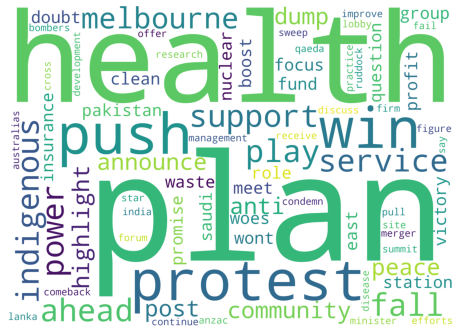


Wordcloud for topic: 1 



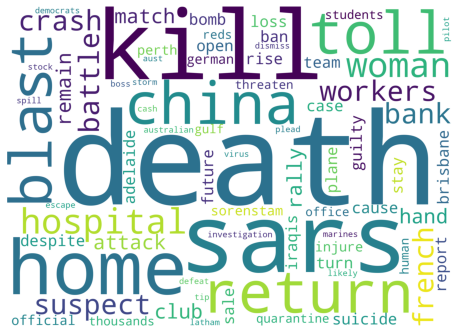


Wordcloud for topic: 2 



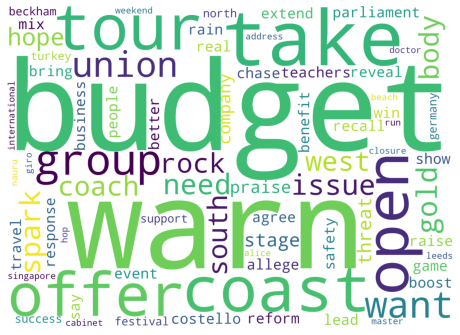


Wordcloud for topic: 3 



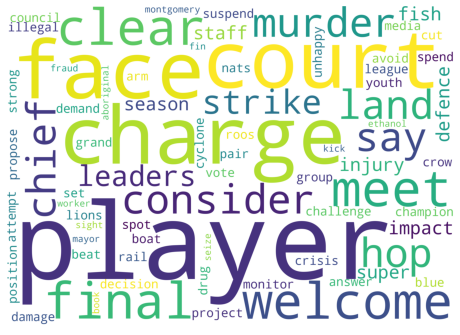


Wordcloud for topic: 4 



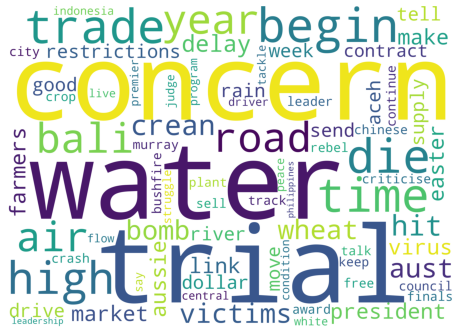


Wordcloud for topic: 5 



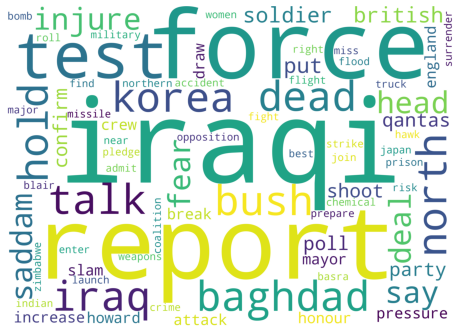


Wordcloud for topic: 6 



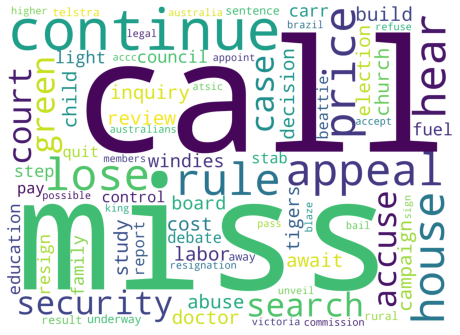


Wordcloud for topic: 7 



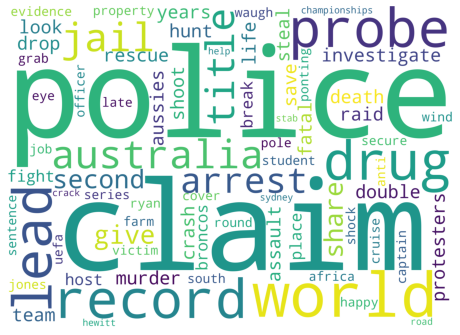


Wordcloud for topic: 8 



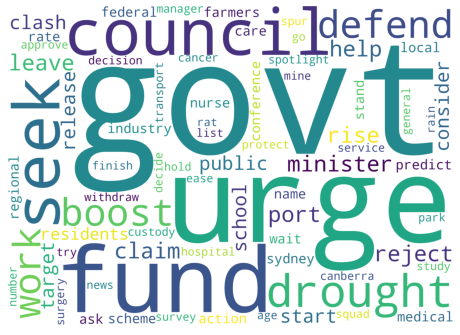


Wordcloud for topic: 9 



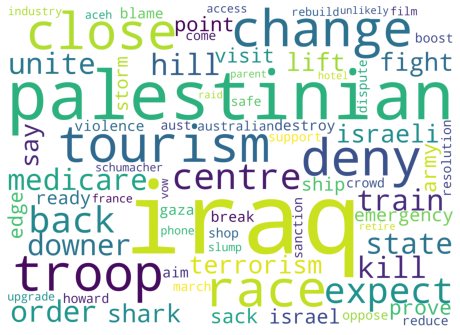

In [58]:
for topic in range(10):
    #plt.figure(figsize=(10,15))
    word_cloud(topic, lda_model)


Wordcloud for topic: 0 



<Figure size 720x1080 with 0 Axes>

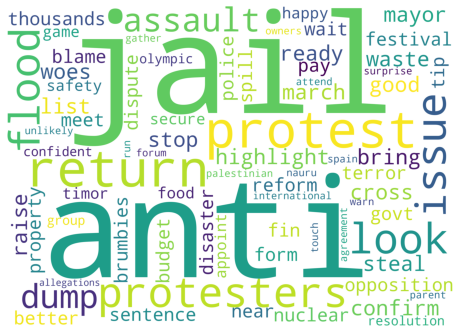


Wordcloud for topic: 1 



<Figure size 720x1080 with 0 Axes>

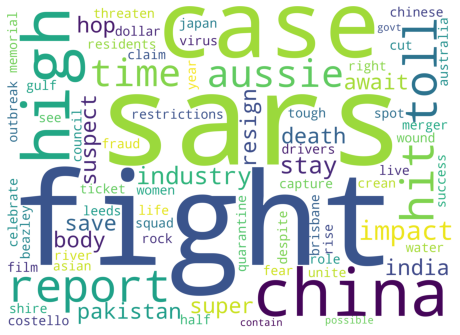


Wordcloud for topic: 2 



<Figure size 720x1080 with 0 Axes>

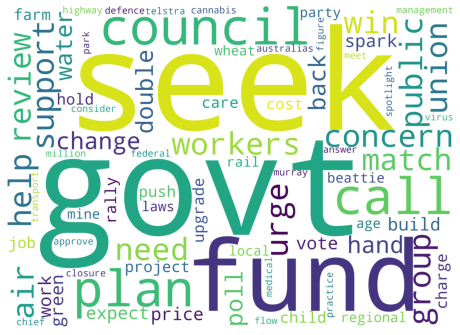


Wordcloud for topic: 3 



<Figure size 720x1080 with 0 Axes>

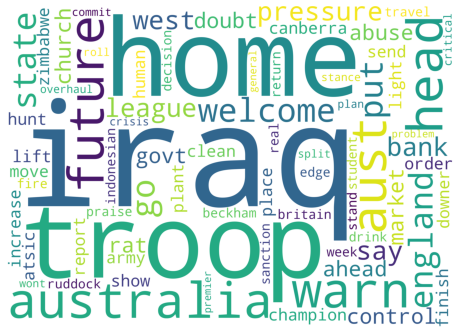


Wordcloud for topic: 4 



<Figure size 720x1080 with 0 Axes>

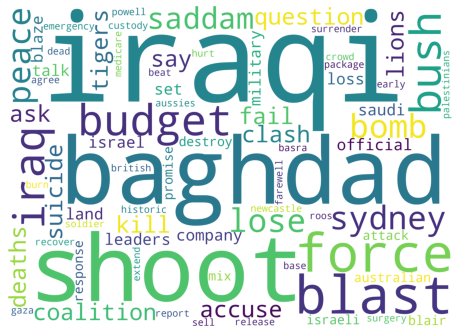


Wordcloud for topic: 5 



<Figure size 720x1080 with 0 Axes>

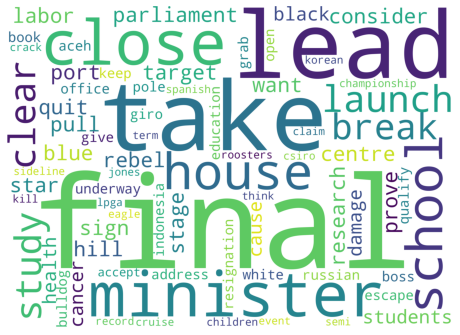


Wordcloud for topic: 6 



<Figure size 720x1080 with 0 Axes>

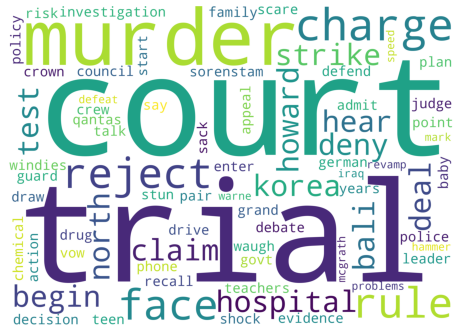


Wordcloud for topic: 7 



<Figure size 720x1080 with 0 Axes>

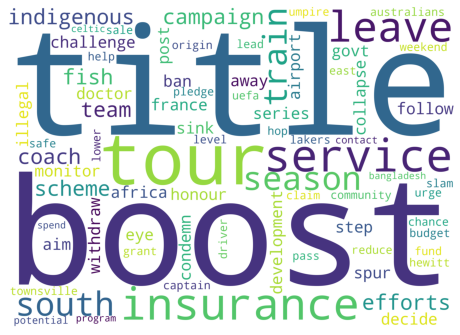


Wordcloud for topic: 8 



<Figure size 720x1080 with 0 Axes>

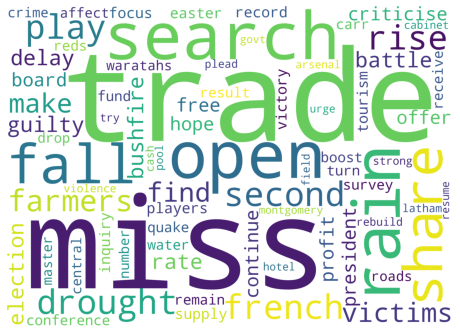


Wordcloud for topic: 9 



<Figure size 720x1080 with 0 Axes>

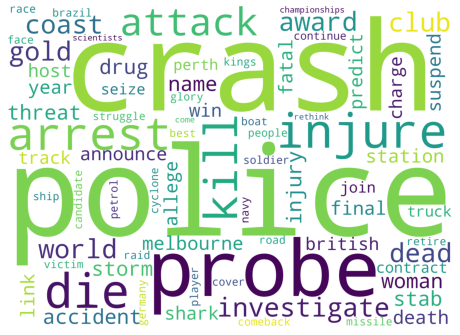

In [59]:
for topic in range(10):
    plt.figure(figsize=(10,15))
    word_cloud(topic, lda_model_tfidf)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


[<1x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 5 stored elements in Compressed Sparse Row format>,
 <1x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 5 stored elements in Compressed Sparse Row format>,
 <1x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 6 stored elements in Compressed Sparse Row format>,
 <1x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 5 stored elements in Compressed Sparse Row format>]

In [6]:
words=vectorizer.get_feature_names()

words

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [20]:
vectorizer.inverse_transform(X)

[array(['document', 'first', 'the', 'is', 'this'], dtype='<U8'),
 array(['second', 'document', 'the', 'is', 'this'], dtype='<U8'),
 array(['one', 'third', 'and', 'the', 'is', 'this'], dtype='<U8'),
 array(['document', 'first', 'the', 'is', 'this'], dtype='<U8')]